https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn import linear_model, neighbors, datasets, preprocessing, metrics, svm
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
# Utilizaremos solo imagenes de 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (125, 94)
n_samples: 1288
n_classes: 7


In [3]:
print(target_names)
print(X.shape)
print(y.shape)
print(y[0])
print(X[0])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 125, 94)
(1288,)
5
[[0.99607843 0.99607843 0.9986928  ... 0.21699347 0.20261438 0.20653595]
 [0.99607843 0.9973857  0.99607843 ... 0.22222222 0.20261438 0.20653595]
 [0.9986928  0.9973857  0.99346405 ... 0.2248366  0.20522876 0.20522876]
 ...
 [0.3150327  0.29542485 0.2535948  ... 0.39346406 0.37908497 0.37124184]
 [0.29934642 0.2875817  0.2535948  ... 0.38562092 0.38300657 0.38300657]
 [0.27973858 0.27320263 0.25751635 ... 0.38431373 0.38039216 0.38039216]]


In [4]:
#Funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

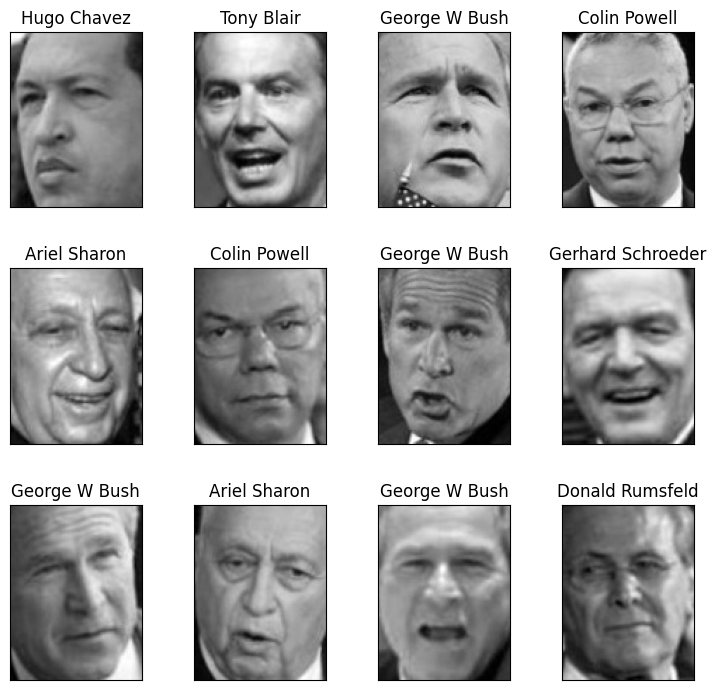

In [5]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

In [6]:
print(np.max(X))
print(np.min(X))

1.0
0.0


# PRUEBAS

In [66]:
X[0].shape

(125, 94)

In [70]:
X[0]

array([[0.99607843, 0.99607843, 0.9986928 , ..., 0.21699347, 0.20261438,
        0.20653595],
       [0.99607843, 0.9973857 , 0.99607843, ..., 0.22222222, 0.20261438,
        0.20653595],
       [0.9986928 , 0.9973857 , 0.99346405, ..., 0.2248366 , 0.20522876,
        0.20522876],
       ...,
       [0.3150327 , 0.29542485, 0.2535948 , ..., 0.39346406, 0.37908497,
        0.37124184],
       [0.29934642, 0.2875817 , 0.2535948 , ..., 0.38562092, 0.38300657,
        0.38300657],
       [0.27973858, 0.27320263, 0.25751635, ..., 0.38431373, 0.38039216,
        0.38039216]], dtype=float32)

In [74]:
C = X[0].ravel()
C

array([0.99607843, 0.9973857 , 0.99607843, 0.99607843, 0.99346405,
       0.9986928 , 0.98692816, 0.9751634 , 0.972549  , 0.94379085,
       0.8666666 , 0.73333335, 0.6313725 , 0.56862754, 0.56993467,
       0.62091506, 0.7254903 , 0.77124184, 0.7908497 , 0.7921569 ,
       0.793464  , 0.7856209 , 0.7738562 , 0.77777785, 0.7568627 ,
       0.76862746, 0.772549  , 0.78039217, 0.77124184, 0.75555557,
       0.7568627 , 0.7568627 , 0.7490196 , 0.7411764 , 0.7411764 ,
       0.7411764 , 0.73333335, 0.72156864, 0.7137255 , 0.7176471 ,
       0.7254903 , 0.7294118 , 0.73333335, 0.7254903 , 0.72156864,
       0.72156864, 0.72287583, 0.71503264, 0.7111111 , 0.70718956,
       0.70065355, 0.69673204, 0.68888897, 0.68496734, 0.675817  ,
       0.67189544, 0.67189544, 0.675817  , 0.675817  , 0.6679738 ,
       0.65882355, 0.65882355, 0.65882355, 0.64705884, 0.63267976,
       0.62091506, 0.61568636, 0.6117647 , 0.61045754, 0.6143791 ,
       0.606536  , 0.5947712 , 0.59607846, 0.60784316, 0.60653

In [58]:
B = X[0].reshape(-1, 1)
print(type(B))

<class 'numpy.ndarray'>


In [59]:
B.shape

(11750, 1)

In [75]:
A = []
for i in range(len(X)):
    A.append(X[i].ravel())
A = np.array(A)

In [78]:
A.ndim

2

In [26]:
A.shape

(1288, 11750, 1)

In [27]:
A.ndim

3

In [28]:
A[0].transpose()

array([[0.99607843, 0.99607843, 0.9986928 , ..., 0.38431373, 0.38039216,
        0.38039216]], dtype=float32)

In [29]:
print(len(X[0]))
print(len(A[0]))

125
11750


In [13]:
A[-1].transpose()

array([[0.12287582, 0.13071896, 0.10457516, ..., 0.18954249, 0.24705882,
        0.3882353 ]], dtype=float32)